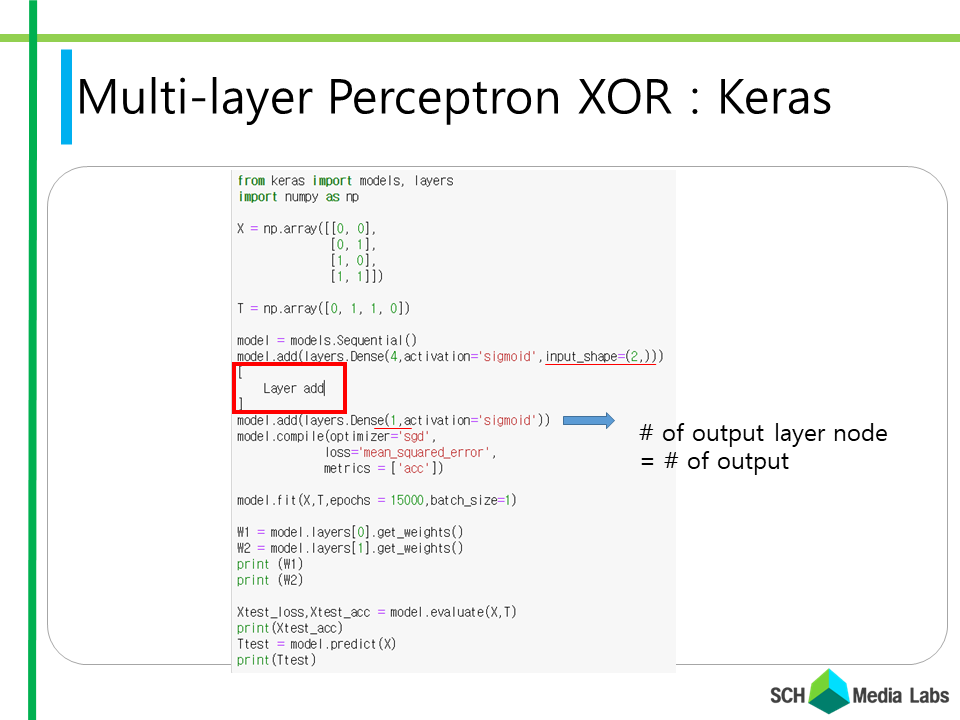

In [2]:
i10 = Image(filename='multilayerperceptron_fig/figure10.png')

display(i10)

In [ ]:
from tensorflow.keras import models, layers, Input, Model
import numpy as np
    
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

T = np.array([0,0,0,1])
model = models.Sequential()
model.add(layers.Dense(units = 4, activation = 'sigmoid',  input_shape = (2,)))
model.add(layers.Dense(units = 1, activation = 'sigmoid'))


model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics = ['acc'])

model.fit(X,T,epochs = 15000,batch_size=4)

Xtest_loss,Xtest_acc = model.evaluate(X,T)
print(Xtest_acc)
Ttest = model.predict(X)
print(Ttest)

# regression example

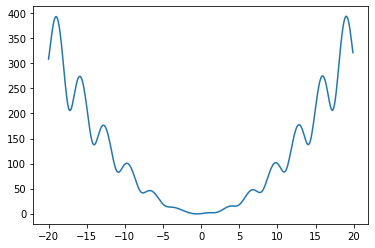

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras import models, layers, regularizers

x = np.arange(-20, 20, 0.1) 
y = np.sin(2*x)+np.power(x,2)*np.log(np.power(np.cos(x),2)+2)

plt.plot(x,y)
plt.show()

In [ ]:
model = models.Sequential()

model.add(layers.Dense(100, activation = "relu", input_shape=(1,)))
model.add(layers.Dense(100, activation = "relu")
model.add(layers.Dense(1,activation='linear'))
          
model.compile(optimizer='adam',loss='mean_squared_error',metrics = ['acc'])

model.fit(x,y,epochs = 5000,batch_size=4096*2, validation_split = 0.2)

ytest = model.predict(x)
plt.plot(x,y)
plt.plot(x,ytest)

plt.show()

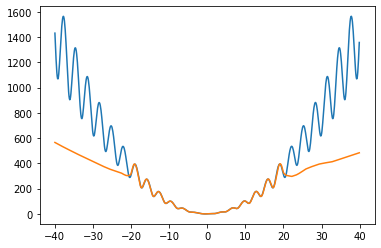

In [5]:
x = np.arange(-40, 40, 0.1) 
y = np.sin(2*x)+np.power(x,2)*np.log(np.power(np.cos(x),2)+2)

xtest = np.arange(-40,40,0.1)
ytest = model.predict(xtest) 
plt.plot(x,y)
plt.plot(xtest,ytest)

plt.show()

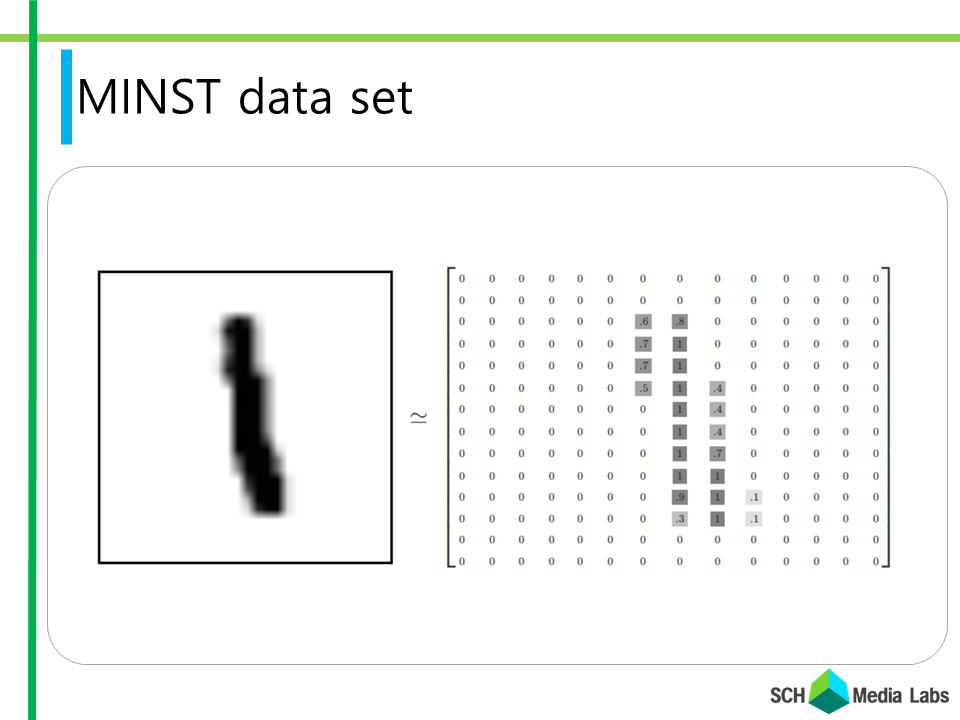

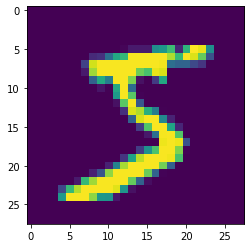

In [22]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt 

batch_size = 4096
num_classes = 10
epochs = 50

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape

plt.figure()
plt.imshow(x_train[0])
plt.show()


In [23]:
x_train = x_train.reshape(60000, x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


60000 train samples
10000 test samples


In [24]:
import tensorflow.keras

# convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# model generation

model = Sequential()
## model add
model.add(layers.Dense(units = 1028, activation = 'relu',input_shape = (784,)))

######################

model.add(layers.Dense(units = num_classes, activation = 'softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_split=0.2)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
model.save('my_model.h5') 

In [ ]:
new_model = tensorflow.keras.models.load_model('my_model.h5') 

In [ ]:
new_model.summary()

for layers in new_model.layers :
    print(layers)

In [ ]:
new_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

new_model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))